In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
my_cols = ["subject#", "jitter(%)", "jitter(abs)", "jitter(rap)", "jitter(ppq5)", "jitter(ddp)", "shimmer(%)", "shimmer(abs)", "shimmer(apq3)", "shimmer(apq5)", "shimmer(apq11)", "shimmer(dda)", "AutocorrelationBetweenNHRAndHNR", "nhr", "hnr", "MedianPitch", "MeanPitch", "StandardDeviationOfPitch", "MinimumPitch", "MaximumPitch", "NumberOfPulses", "NumberOfPeriods", "MeanPeriod", "StandardDeviationOfPeriod", "FractionOfUnvoicedFrames", "NumberOfVoiceBreaks", "DegreeOfVoiceBreaks", "UPDRS", "PD"]

dataset = pd.read_csv("/content/drive/My Drive/datascience/po1_data.txt", names=my_cols, engine='python')

In [78]:
# Identify which columns in your dataset contain numeric data. You can use select_dtypes to filter numeric columns:
numeric_cols = dataset.select_dtypes(include=['number'])

In [79]:
# Calculate the mean (average) for each numeric column.
means = numeric_cols.mean()

# Calculate the mean (average) for each numeric column.
medians = numeric_cols.median()

# Calculate the standard deviation for each numeric column.
std_devs = numeric_cols.std()

# Calculate the IQR, which is the range between the 25th and 75th percentiles, for each numeric column. The IQR is often used to detect outliers.
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQRs = Q3 - Q1

# Calculate the Z-score for each data point in a column. The Z-score measures how many standard deviations a data point is away from the mean. Values with a Z-score greater than a threshold (e.g., 2 or 3) can be considered outliers.
z_scores = (numeric_cols - means) / std_devs
threshold = 3  # Adjust as needed
outliers = (z_scores.abs() > threshold)

# Use the IQR to identify outliers. Data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are often considered outliers.
lower_bound = Q1 - 1.5 * IQRs
upper_bound = Q3 + 1.5 * IQRs
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound))

In [80]:
# Function to handle outliers by capping them at a specified percentile
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return data

# Apply outlier handling to selected columns
for col in outliers:
    dataset = handle_outliers(dataset, col)

# Now, dataset contains your dataset with outliers handled by capping.

In [81]:
dataset

subject#  jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  \
0            1      1.488     0.000090        0.900         0.794   
1            1      0.728     0.000038        0.353         0.376   
2            1      1.220     0.000074        0.732         0.670   
3            1      2.502     0.000123        1.156         1.634   
4            1      3.509     0.000167        1.715         1.539   
...        ...        ...          ...          ...           ...   
1035        40      5.127     0.000398        2.721         2.510   
1036        40      1.757     0.000133        0.808         0.690   
1037        40      2.912     0.000226        1.141         1.266   
1038        40      3.788     0.000275        1.786         1.484   
1039        40      1.809     0.000149        0.680         0.843   

      jitter(ddp)  shimmer(%)  shimmer(abs)  shimmer(apq3)  shimmer(apq5)  \
0           2.699       8.334         0.779          4.517          4.609   
1           1.059       5.864         0.642          2.058          3.180   
2           2.196       8.719         0.875          4.347          5.166   
3           3.469      13.513         1.273          5.263          8.771   
4           5.145       9.112         1.040          3.102          4.927   
...           ...         ...           ...            ...            ...   
1035        8.162       9.846         0.965          4.593          6.806   
1036        2.425       7.571         0.740          2.720          3.927   
1037        3.423      15.489         1.456          6.433         10.138   
1038        5.359      15.702         1.367          6.374         11.094   
1039        2.040       7.881         0.782          2.690          4.543   

      ...  MaximumPitch  NumberOfPulses  NumberOfPeriods  MeanPeriod  \
0     ...      187.5760         160.000          159.000    0.006065   
1     ...      234.5050         170.000          169.000    0.005181   
2     ...      211.4420         218.375          211.375    0.006071   
3     ...      220.2300          94.000           92.000    0.004910   
4     ...      225.1620         117.000          114.000    0.004757   
...   ...           ...             ...              ...         ...   
1035  ...      158.5910          63.000           60.000    0.007766   
1036  ...      143.7970          47.000           44.000    0.007561   
1037  ...      149.6410          79.000           77.000    0.007767   
1038  ...      444.0195          75.000           70.000    0.007257   
1039  ...      137.5460          62.000           60.000    0.008211   

      StandardDeviationOfPeriod  FractionOfUnvoicedFrames  \
0                      0.000416                     0.000   
1                      0.000403                     2.247   
2                      0.000474                    10.656   
3                      0.000320                     0.000   
4                      0.000380                    18.182   
...                         ...                       ...   
1035                   0.001066                    24.194   
1036                   0.000430                    46.053   
1037                   0.000881                    20.000   
1038                   0.001714                    16.667   
1039                   0.000566                    18.182   

      NumberOfVoiceBreaks  DegreeOfVoiceBreaks  UPDRS  PD  
0                     0.0                0.000     23   1  
1                     0.0                0.000     23   1  
2                     1.0                0.178     23   1  
3                     0.0                0.000     23   1  
4                     1.0               13.318     23   1  
...                   ...                  ...    ...  ..  
1035                  2.0               15.113      1   0  
1036                  1.0               25.792      1   0  
1037                  1.0                4.574      1   0  
1038                  2.5               19.575      1 

In [82]:
# Summary Statistics
summary_stats = dataset.describe()

summary_stats

subject#    jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  \
count  1040.00000  1040.000000  1040.000000  1040.000000   1040.000000   
mean     20.50000     2.590774     0.000168     1.184651      1.262466   
std      11.54895     1.441606     0.000099     0.744174      0.780115   
min       1.00000     0.190000     0.000006     0.062000      0.081000   
25%      10.75000     1.507500     0.000095     0.617000      0.665750   
50%      20.50000     2.396000     0.000151     1.035500      1.126500   
75%      30.25000     3.411500     0.000229     1.602500      1.694750   
max      40.00000     6.267500     0.000431     3.080750      3.238250   

       jitter(ddp)   shimmer(%)  shimmer(abs)  shimmer(apq3)  shimmer(apq5)  \
count  1040.000000  1040.000000   1040.000000    1040.000000    1040.000000   
mean      3.554010    12.773238      1.188592       5.571262       7.682834   
std       2.232711     5.021658      0.401831       2.593161       3.581940   
min       0.185000     1.185000      0.236000       0.496000       0.708000   
25%       1.851750     9.353500      0.941000       3.703000       5.160250   
50%       3.107000    12.348500      1.181500       5.134500       7.050500   
75%       4.808500    15.493250      1.411000       6.942000       9.558930   
max       9.243625    24.702875      2.116000      11.800500      16.156950   

       ...  MaximumPitch  NumberOfPulses  NumberOfPeriods   MeanPeriod  \
count  ...   1040.000000     1040.000000      1040.000000  1040.000000   
mean   ...    228.961345       86.798798        82.922476     0.006547   
std    ...    109.407868       59.934149        58.085036     0.001875   
min    ...     85.541000        0.000000         0.000000     0.002039   
25%    ...    143.650750       42.750000        40.750000     0.005039   
50%    ...    195.971000       65.000000        62.000000     0.006484   
75%    ...    263.798250      113.000000       109.000000     0.007923   
max    ...    444.019500      218.375000       211.375000     0.012070   

       StandardDeviationOfPeriod  FractionOfUnvoicedFrames  \
count                1040.000000               1040.000000   
mean                    0.000766                 27.682856   
std                     0.000498                 20.975294   
min                     0.000055                  0.000000   
25%                     0.000404                  8.149250   
50%                     0.000644                 26.501000   
75%                     0.000980                 43.064250   
max                     0.001842                 88.158000   

       NumberOfVoiceBreaks  DegreeOfVoiceBreaks        UPDRS           PD  
count          1040.000000          1040.000000  1040.000000  1040.000000  
mean              0.866346            12.317303    13.000000     0.500000  
std               0.894009            14.995085    15.894745     0.500241  
min               0.000000             0.000000     1.000000     0.000000  
25%               0.000000             0.000000     1.000000     0.000000  
50%               1.000000             5.826000     3.000000     0.500000  
75%               1.000000            22.255500    23.250000     1.000000  
max               2.500000            55.638750    55.000000     1.000000  

[8 rows x 29 columns]

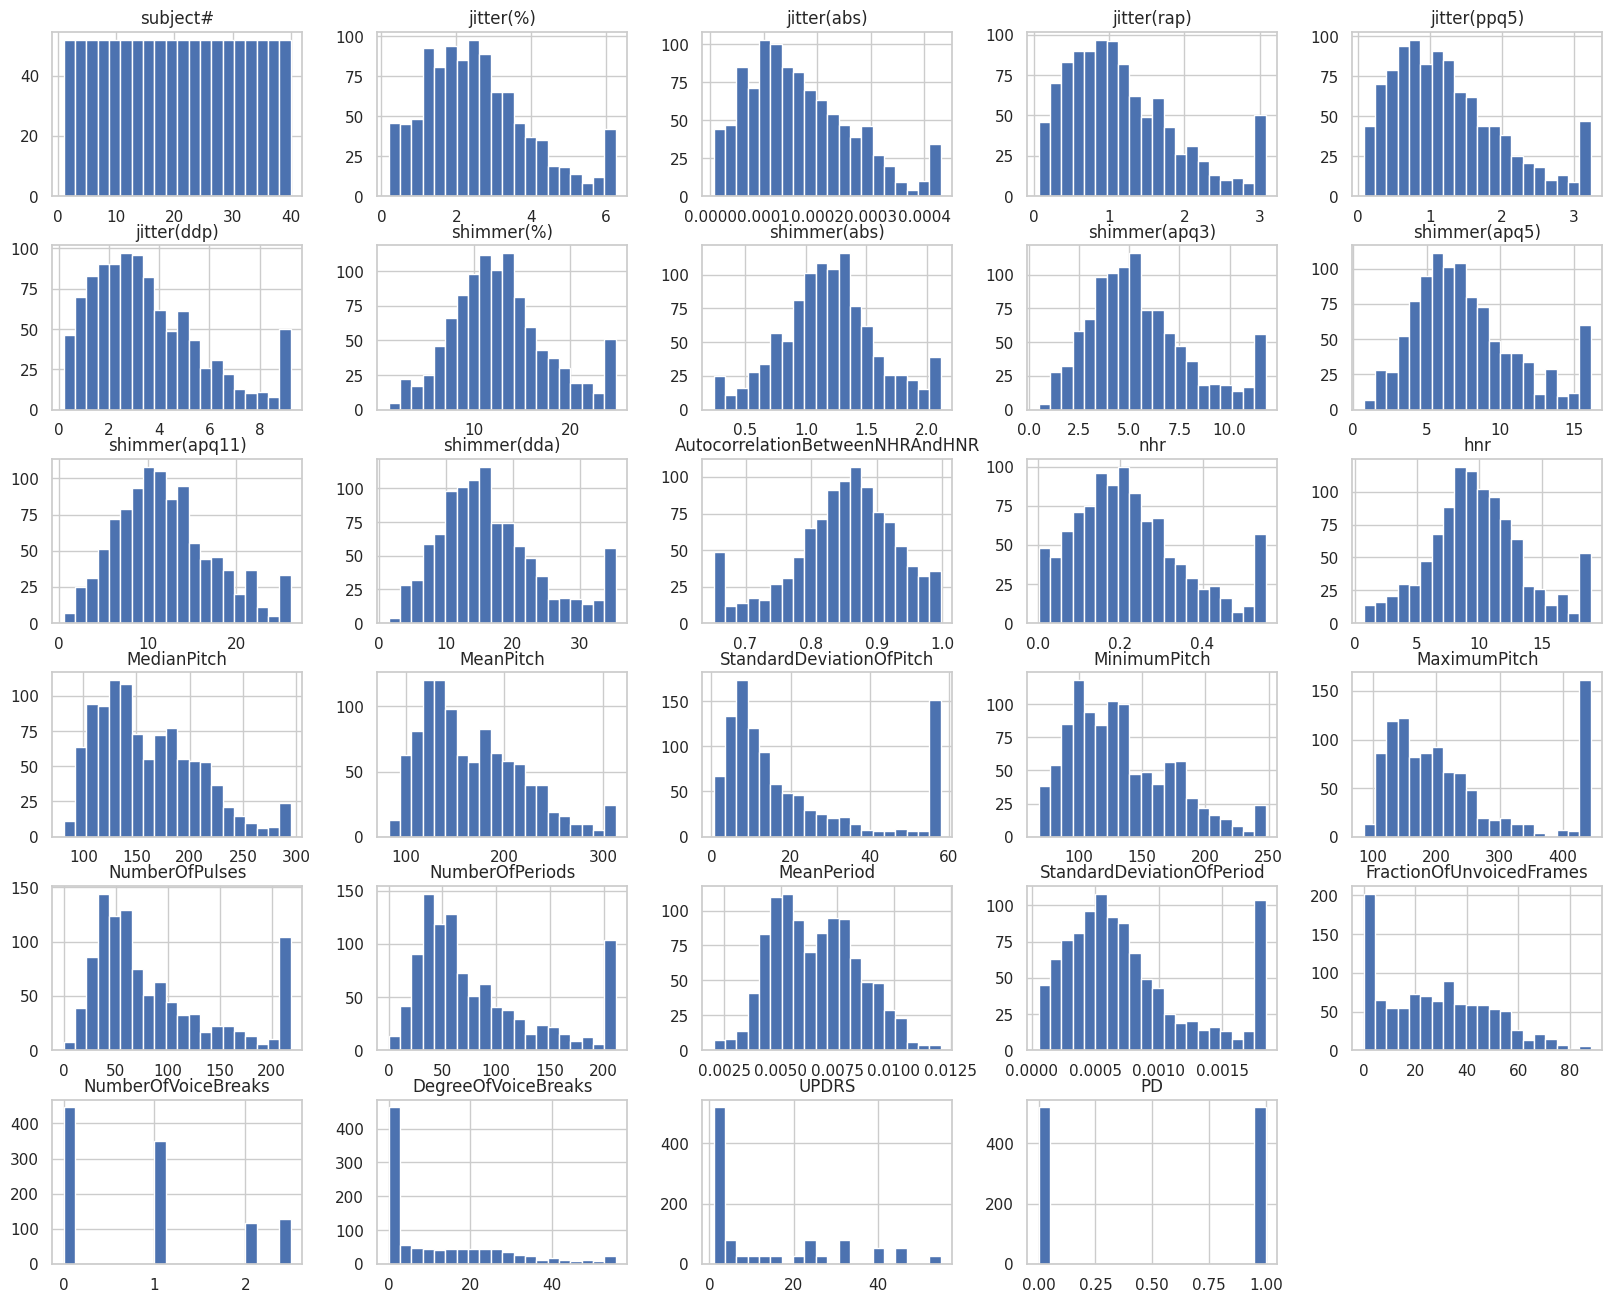

In [83]:
import matplotlib.pyplot as plt

# Create histograms to understand the distribution of numeric variables.
dataset.hist(bins=20, figsize=(20, 16))
plt.margins(x=5, y=5)
plt.show()

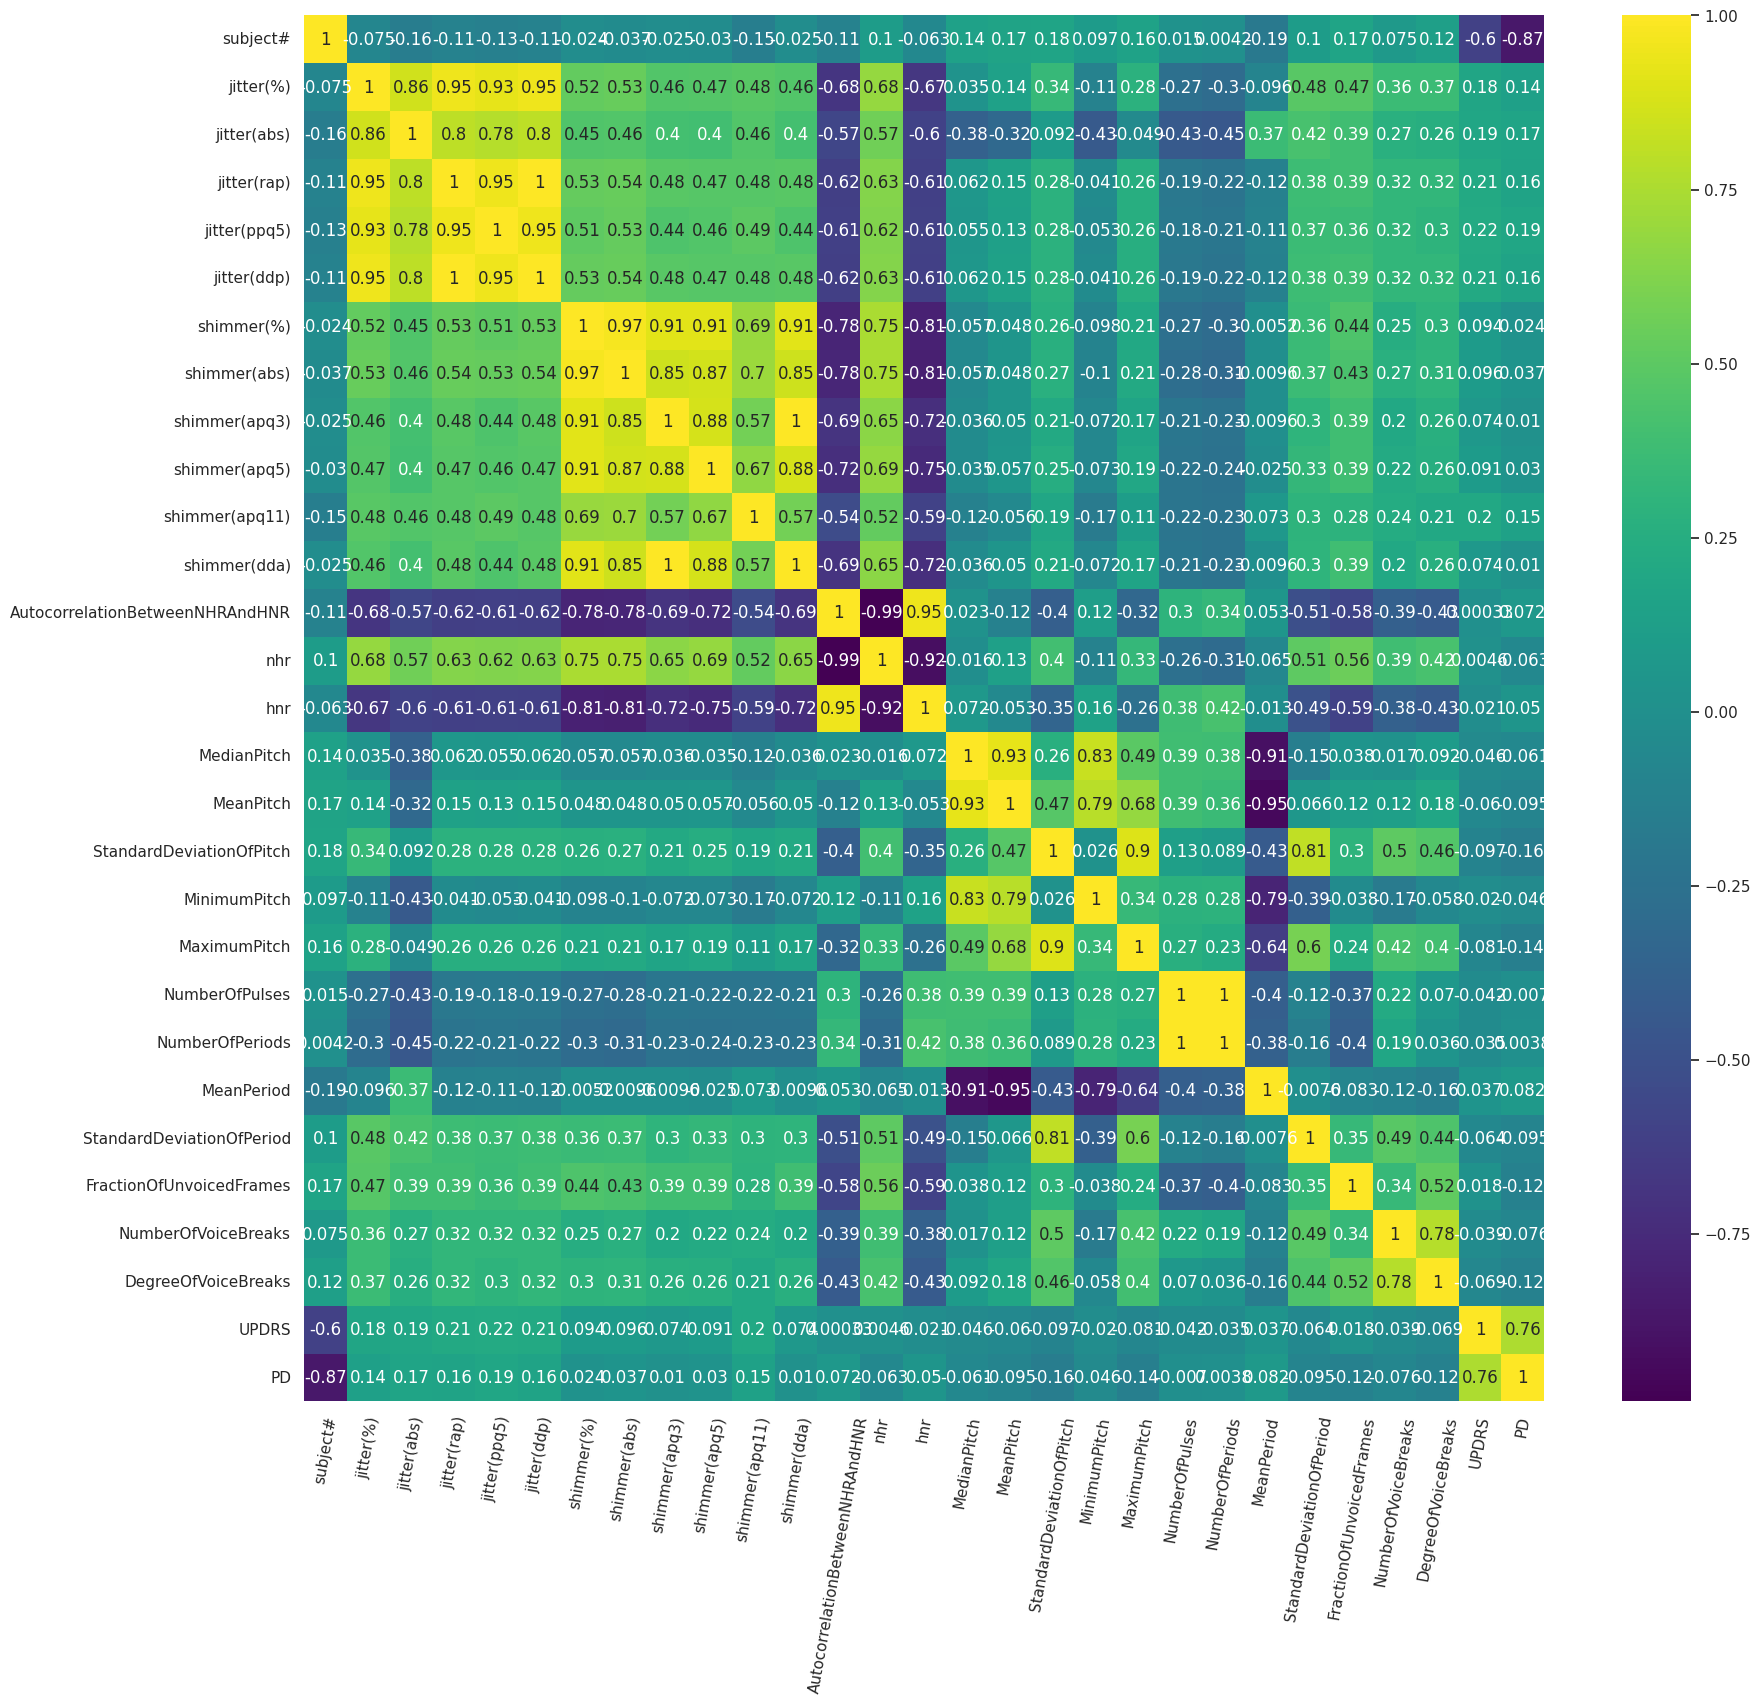

In [84]:
import seaborn as sns
# Calculate and visualize the correlation matrix to understand relationships between numeric variables.
correlation_matrix = dataset.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', xticklabels=True, yticklabels=True)
plt.xticks(rotation=80)  # Rotate the x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Keep the y-axis labels horizontal
plt.show()

In [85]:
missing_data = dataset.isnull().sum()
missing_data

subject#                           0
jitter(%)                          0
jitter(abs)                        0
jitter(rap)                        0
jitter(ppq5)                       0
jitter(ddp)                        0
shimmer(%)                         0
shimmer(abs)                       0
shimmer(apq3)                      0
shimmer(apq5)                      0
shimmer(apq11)                     0
shimmer(dda)                       0
AutocorrelationBetweenNHRAndHNR    0
nhr                                0
hnr                                0
MedianPitch                        0
MeanPitch                          0
StandardDeviationOfPitch           0
MinimumPitch                       0
MaximumPitch                       0
NumberOfPulses                     0
NumberOfPeriods                    0
MeanPeriod                         0
StandardDeviationOfPeriod          0
FractionOfUnvoicedFrames           0
NumberOfVoiceBreaks                0
DegreeOfVoiceBreaks                0
U

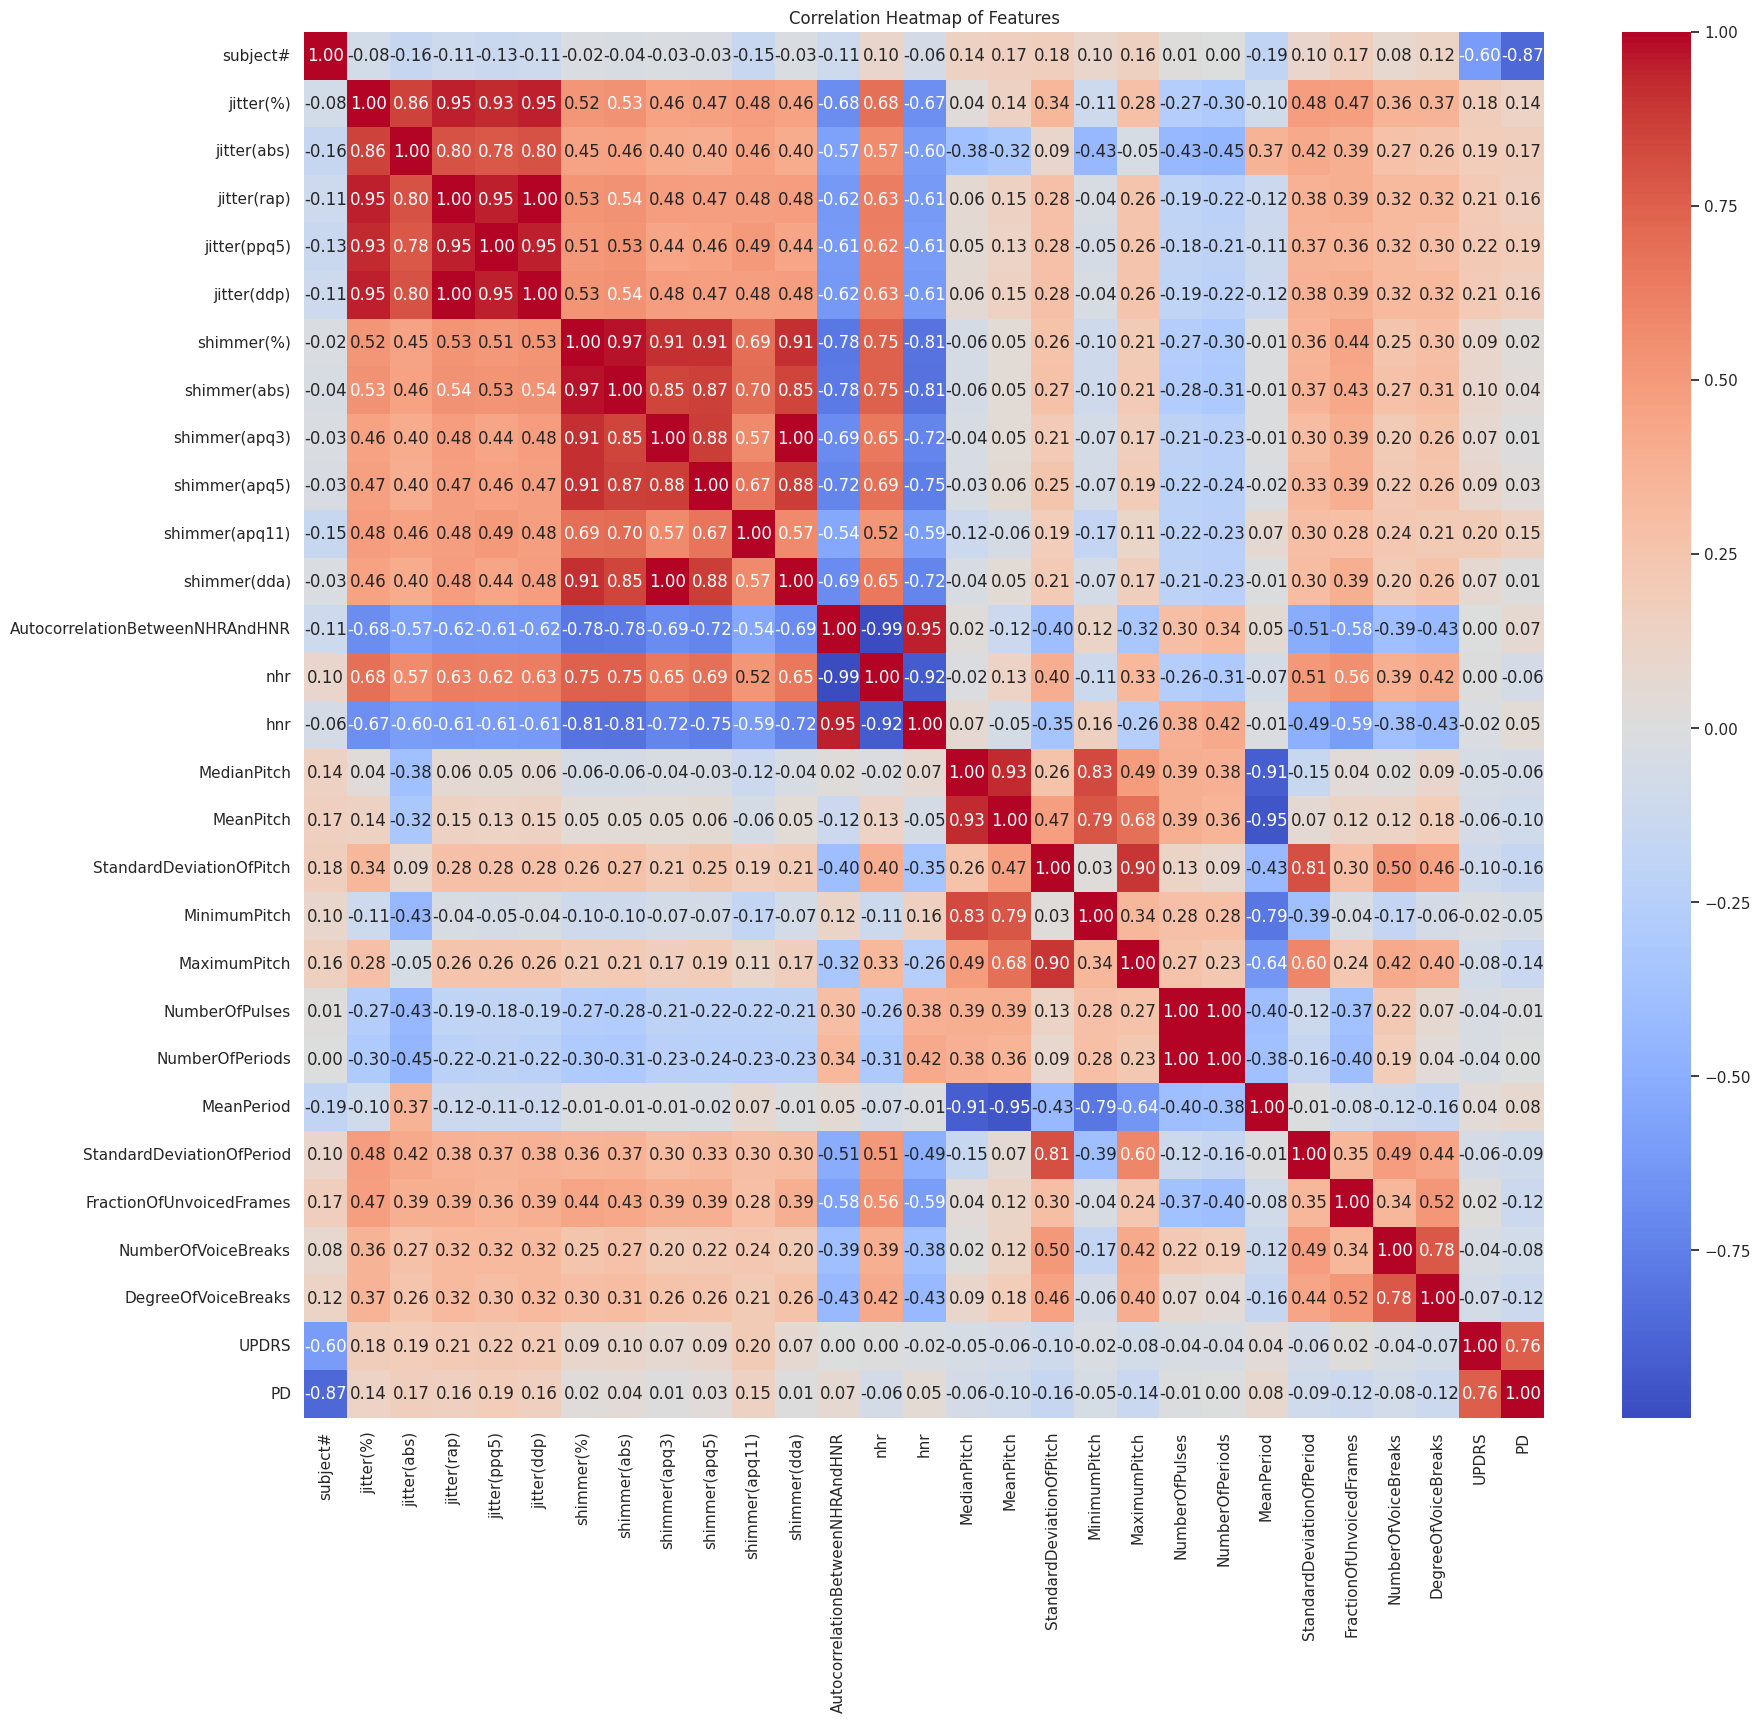

In [86]:
# Create a heatmap of feature correlations to identify which features are highly correlated with each other. This can help in feature selection by avoiding highly correlated features, which may not provide additional information.
correlation_matrix = dataset.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [87]:
pd_group = dataset[dataset['PD'] == 1]
non_pd_group = dataset[dataset['PD'] == 0]

In [88]:
from scipy.stats import ttest_ind
p_values = []
for column in dataset.columns[1:]:
    healthy_values = non_pd_group[column]
    pd_values = pd_group[column]
    t_statistic, p_value = ttest_ind(healthy_values, pd_values)
    p_values.append(p_value)

median_p_value = pd.Series(p_values).median()
iqr_p_value = pd.Series(p_values).quantile(0.75) - pd.Series(p_values).quantile(0.25)


threshold = median_p_value + 1.5 * iqr_p_value

print("Median p-value:", median_p_value)
print("IQR of p-values:", iqr_p_value)
print("Threshold value:", threshold)

Median p-value: 0.005279050554339037
IQR of p-values: 0.16553439390427155
Threshold value: 0.2535806414107464


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [89]:
from scipy import stats
significance_level = threshold
significant_features = []
your_features = dataset.drop(columns=['PD'])

# Extract your target variable
your_target = dataset['PD']

# Create an empty DataFrame to store t-test results
t_test_results = pd.DataFrame(columns=['Feature', 'T-Value', 'P-Value'])

for feature in dataset.columns[1:-2]:  # Exclude 'Study Subject', 'PD' and 'Subject identifier' columns
    healthy_samples = your_features[your_target == 0][feature]
    pd_samples = your_features[your_target == 1][feature]
    t_stat, p_value = stats.ttest_ind(healthy_samples, pd_samples)
    t_test_results = t_test_results.append({'Feature': feature, 'T-Value': t_stat, 'P-Value': p_value}, ignore_index=True)

t_test_results

<ipython-input-89-10c27638054d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Feature': feature, 'T-Value': t_stat, 'P-Value': p_value}, ignore_index=True)
<ipython-input-89-10c27638054d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Feature': feature, 'T-Value': t_stat, 'P-Value': p_value}, ignore_index=True)
<ipython-input-89-10c27638054d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Feature': feature, 'T-Value': t_stat, 'P-Value': p_value}, ignore_index=True)
<ipython-input-89-10c27638054d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

Feature   T-Value       P-Value
0                         jitter(%) -4.416604  1.107698e-05
1                       jitter(abs) -5.720555  1.388034e-08
2                       jitter(rap) -5.300998  1.406687e-07
3                      jitter(ppq5) -6.117175  1.347409e-09
4                       jitter(ddp) -5.300608  1.409619e-07
5                        shimmer(%) -0.762192  4.461187e-01
6                      shimmer(abs) -1.187243  2.354034e-01
7                     shimmer(apq3) -0.323560  7.463365e-01
8                     shimmer(apq5) -0.961276  3.366372e-01
9                    shimmer(apq11) -4.792795  1.884360e-06
10                     shimmer(dda) -0.323586  7.463166e-01
11  AutocorrelationBetweenNHRAndHNR -2.318195  2.063233e-02
12                              nhr  2.023096  4.331916e-02
13                              hnr -1.621063  1.053078e-01
14                      MedianPitch  1.978353  4.815295e-02
15                        MeanPitch  3.087680  2.070812e-03
16         StandardDeviationOfPitch  5.121203  3.617328e-07
17                     MinimumPitch  1.468591  1.422467e-01
18                     MaximumPitch  4.541722  6.233477e-06
19                   NumberOfPulses  0.225862  8.213531e-01
20                  NumberOfPeriods -0.120926  9.037728e-01
21                       MeanPeriod -2.643079  8.339339e-03
22        StandardDeviationOfPeriod  3.066921  2.218762e-03
23         FractionOfUnvoicedFrames  3.961621  7.952773e-05
24              NumberOfVoiceBreaks  2.468665  1.372202e-02
25              DegreeOfVoiceBreaks  4.046996  5.573006e-05

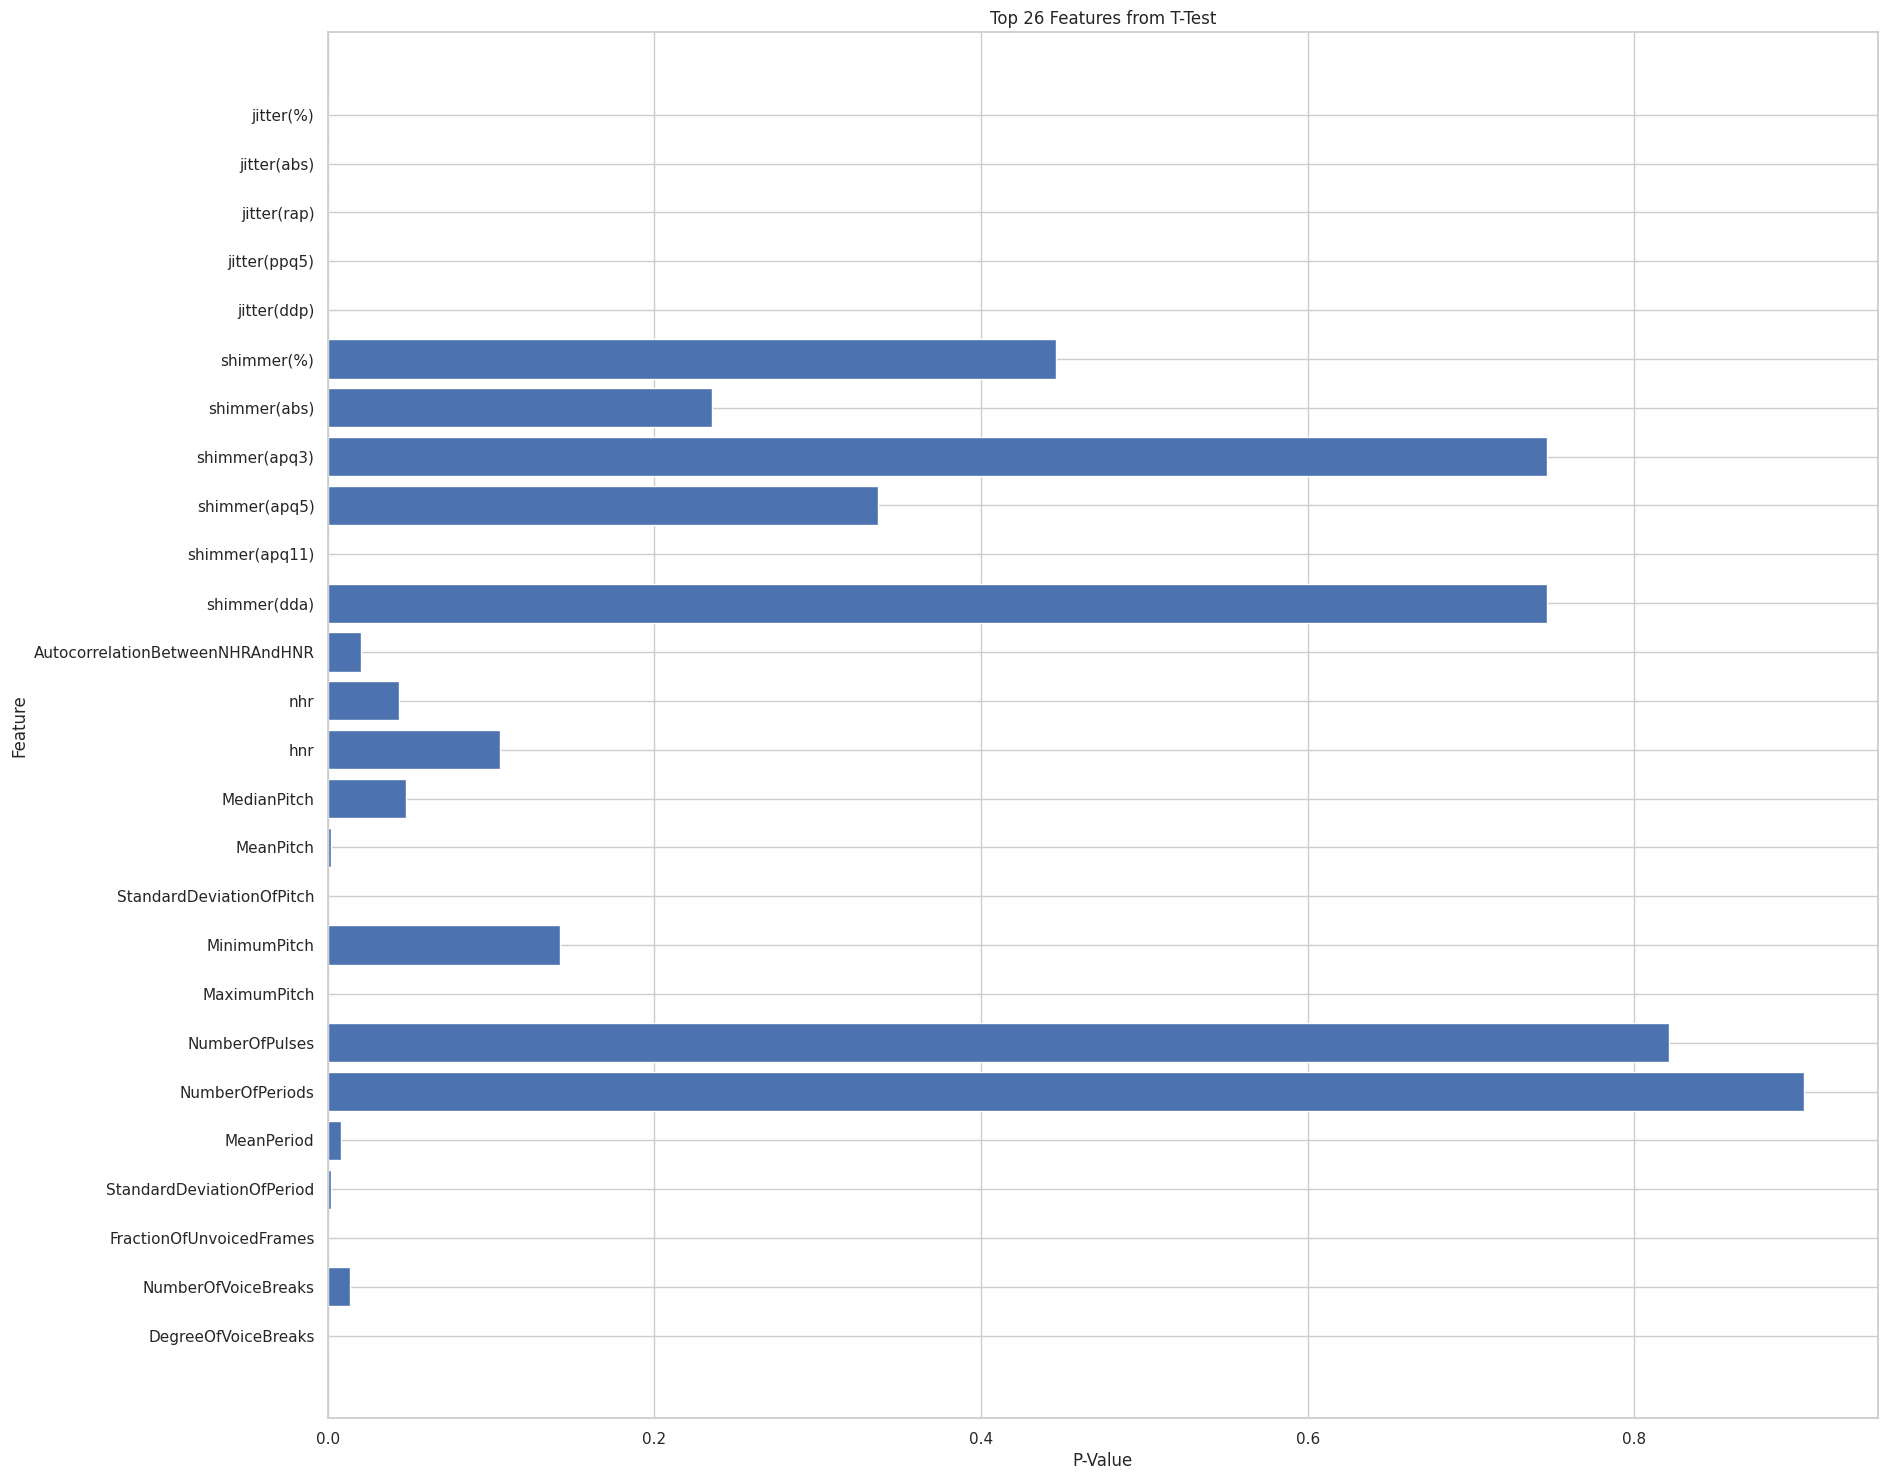

In [90]:
num_top_features = t_test_results[t_test_results.columns[0]].count()
# Bar plot of the top features
plt.figure(figsize=(20, 18))
plt.barh(range(num_top_features), t_test_results['P-Value'][:num_top_features], align='center')
plt.yticks(range(num_top_features), t_test_results['Feature'][:num_top_features])
plt.xlabel('P-Value')
plt.ylabel('Feature')
plt.title(f'Top {num_top_features} Features from T-Test')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most significant feature at the top
plt.show()

In [91]:
dataset2 = pd.read_csv('/content/drive/My Drive/datascience/po2_data.csv')
print("Dataset 2")
print(dataset2)

Dataset 2
      subject#  age  sex  test_time  motor_updrs  total_updrs  jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      jitter(abs)  jitter(rap)  jitter(ppq5)  ...  shimmer(abs)  \
0        0

In [92]:
#dropping rows that contain missing values
dataset2 = dataset2.dropna()

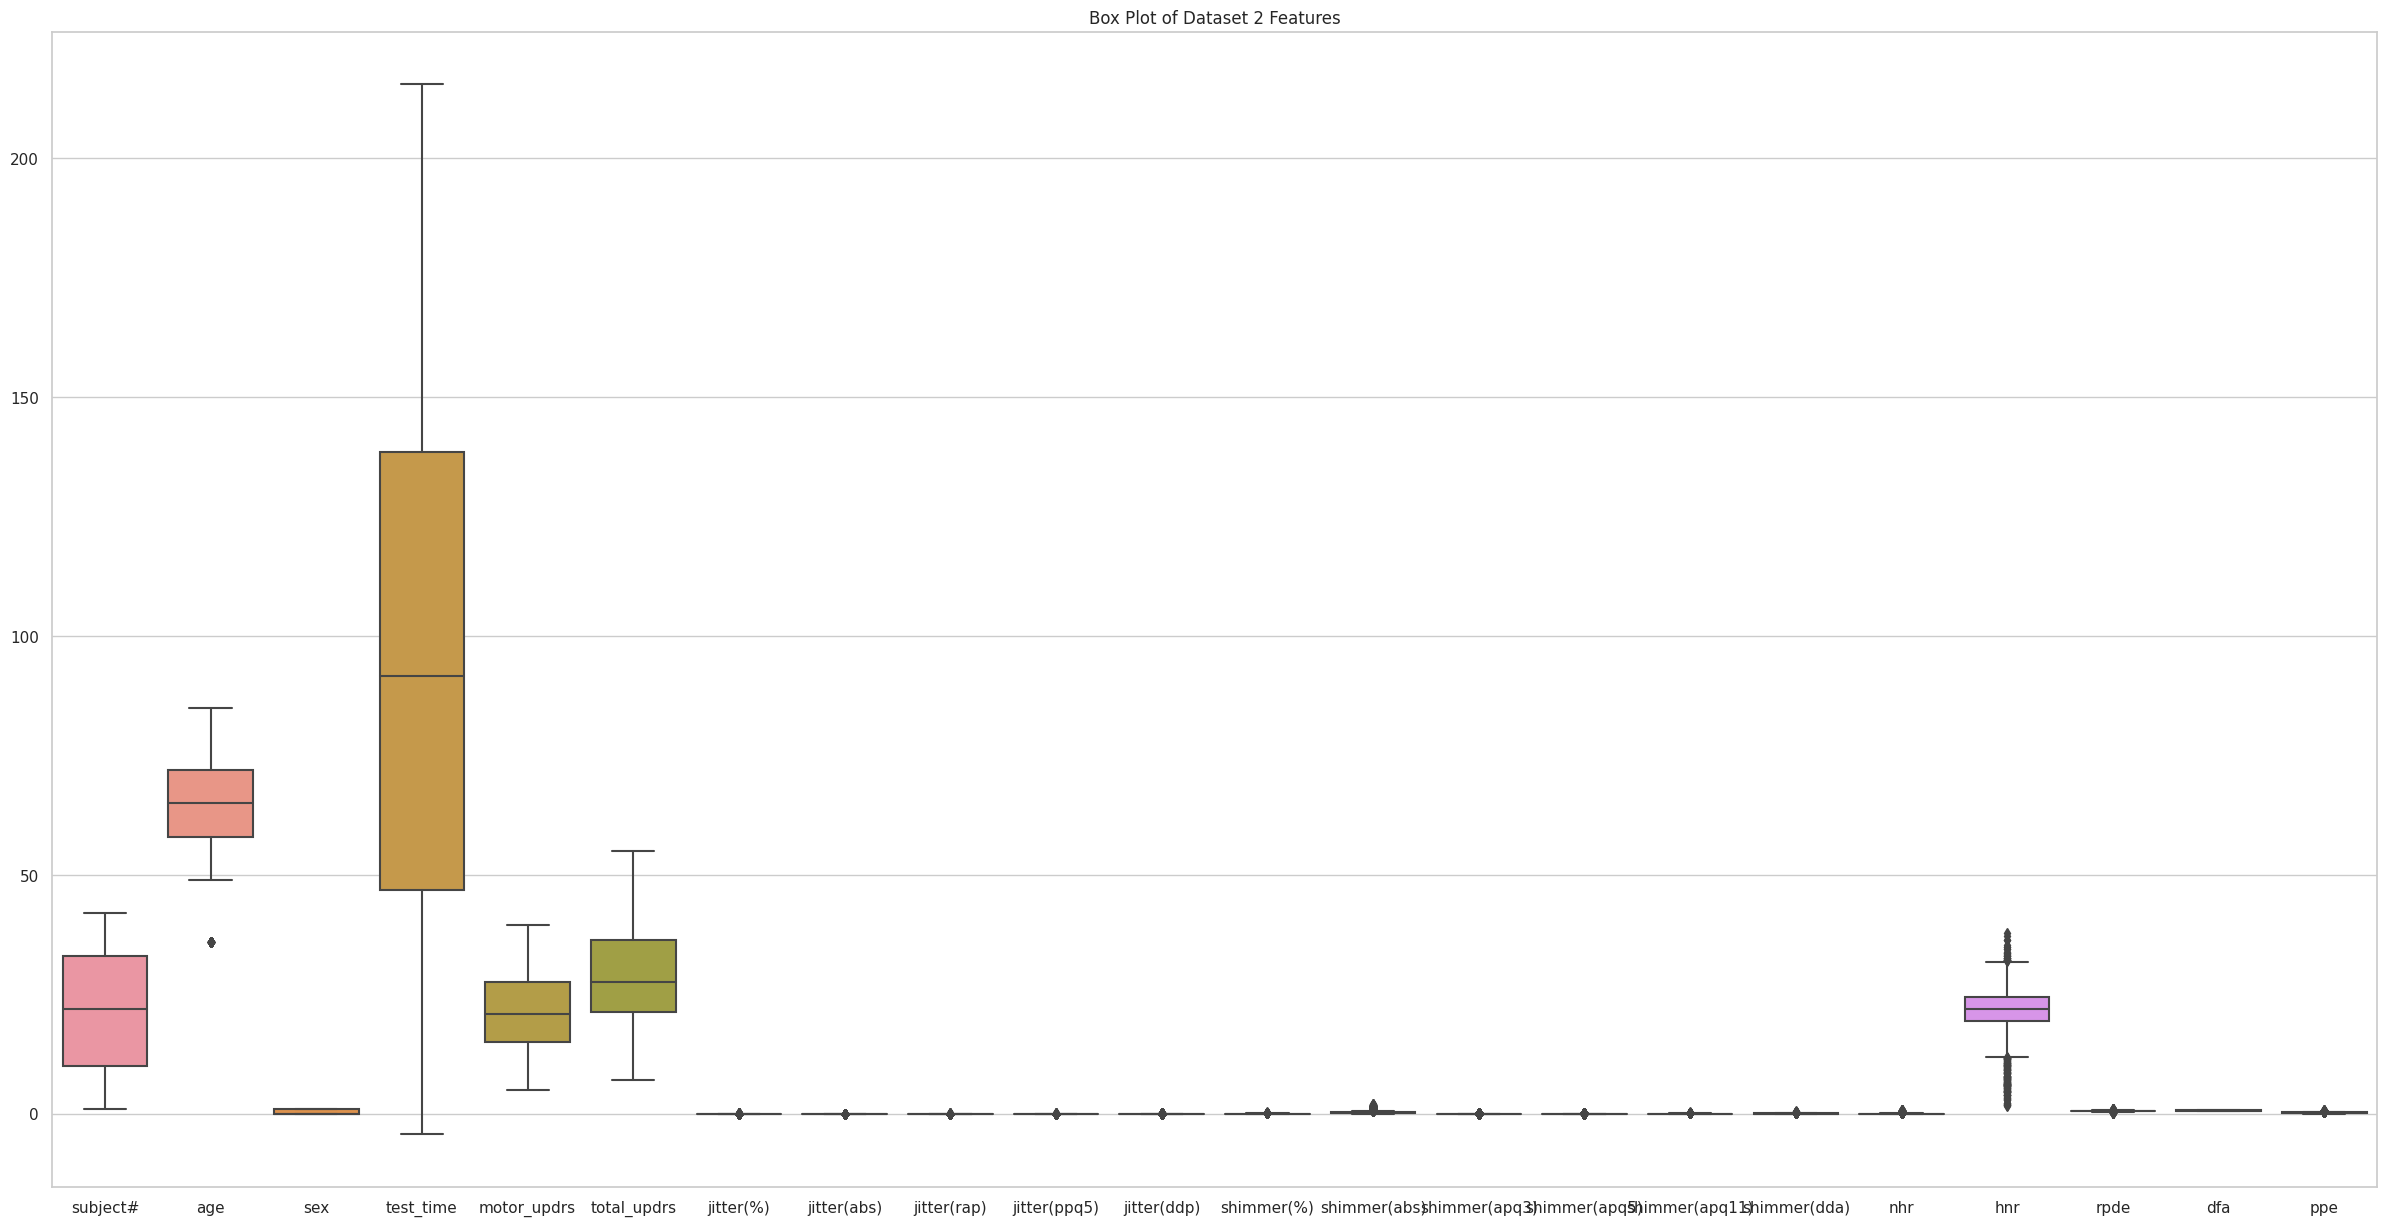

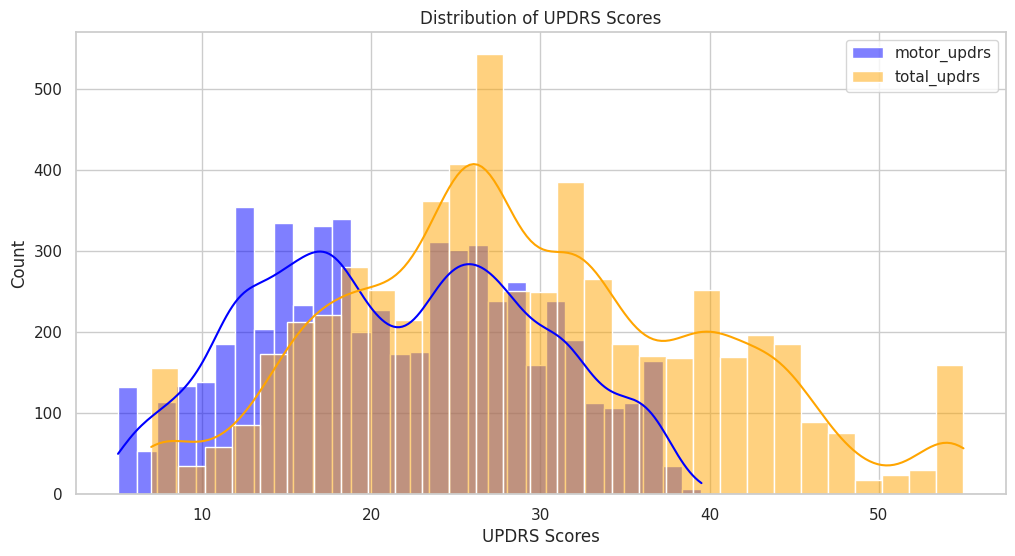

In [93]:
# Example: Visualize outliers using box plots
plt.figure(figsize=(30, 15))
sns.boxplot(data=dataset2)
plt.title("Box Plot of Dataset 2 Features")
plt.show()

# Explore the distribution of target variables (motor_updrs and total_updrs)
plt.figure(figsize=(12, 6))
sns.histplot(dataset2['motor_updrs'], bins=30, kde=True, color='blue', label='motor_updrs')
sns.histplot(dataset2['total_updrs'], bins=30, kde=True, color='orange', label='total_updrs')
plt.title("Distribution of UPDRS Scores")
plt.xlabel("UPDRS Scores")
plt.legend()
plt.show()

In [94]:
import numpy as np
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Extract numerical columns for scaling
numerical_columns = dataset2.select_dtypes(include=[np.number]).columns.tolist()

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the numerical columns
dataset2[numerical_columns] = scaler.fit_transform(dataset2[numerical_columns])

# Display the first few rows of the scaled dataset
print("Scaled Dataset 2:")
print(dataset2.head())

Scaled Dataset 2:
   subject#       age       sex  test_time  motor_updrs  total_updrs  \
0 -1.656596  0.815695 -0.682509  -1.632090     0.849197     0.502745   
1 -1.656596  0.815695 -0.682509  -1.500676     0.879706     0.549103   
2 -1.656596  0.815695 -0.682509  -1.369410     0.910216     0.595367   
3 -1.656596  0.815695 -0.682509  -1.257773     0.936051     0.634716   
4 -1.656596  0.815695 -0.682509  -1.108169     0.970743     0.687522   

   jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  ...  shimmer(abs)  \
0   0.082905    -0.284242     0.327453     -0.028637  ...     -0.351642   
1  -0.560793    -0.756723    -0.533746     -0.476212  ...     -0.573156   
2  -0.238944    -0.539382    -0.300038     -0.320767  ...     -0.564469   
3  -0.155370    -0.485186    -0.344859     -0.170682  ...      0.069668   
4  -0.498557    -0.663894    -0.658604     -0.529814  ...     -0.586186   

   shimmer(apq3)  shimmer(apq5)  shimmer(apq11)  shimmer(dda)       nhr  \
0      -0.209709      -

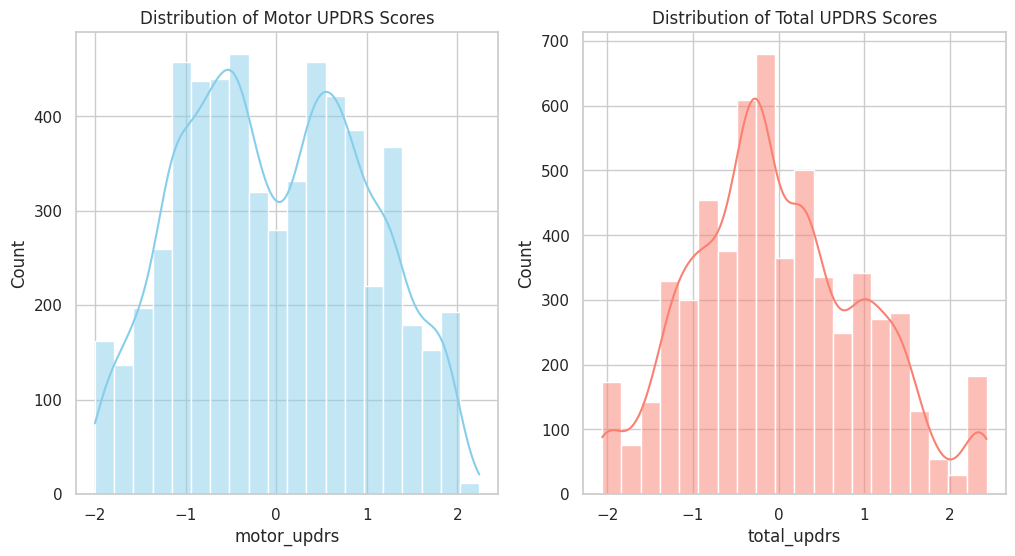

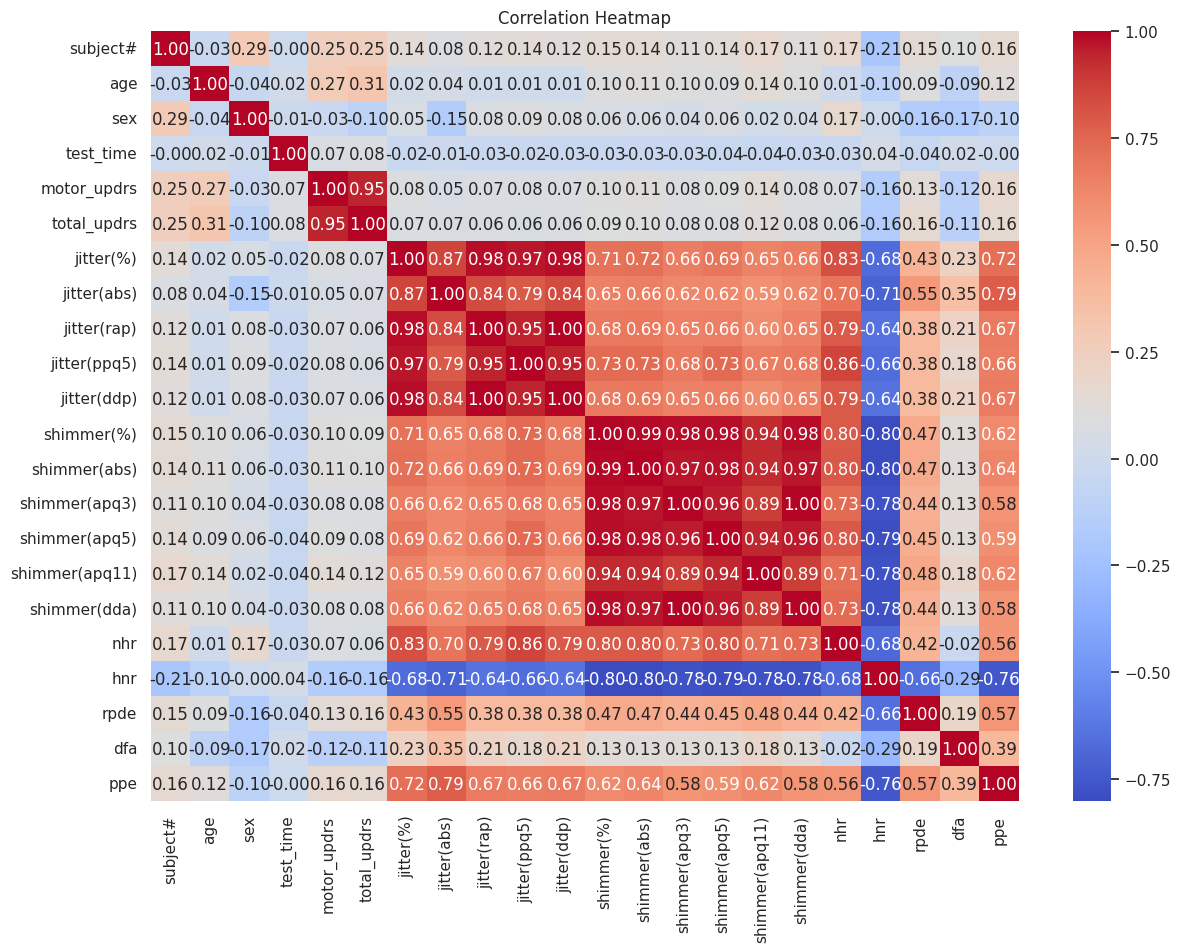

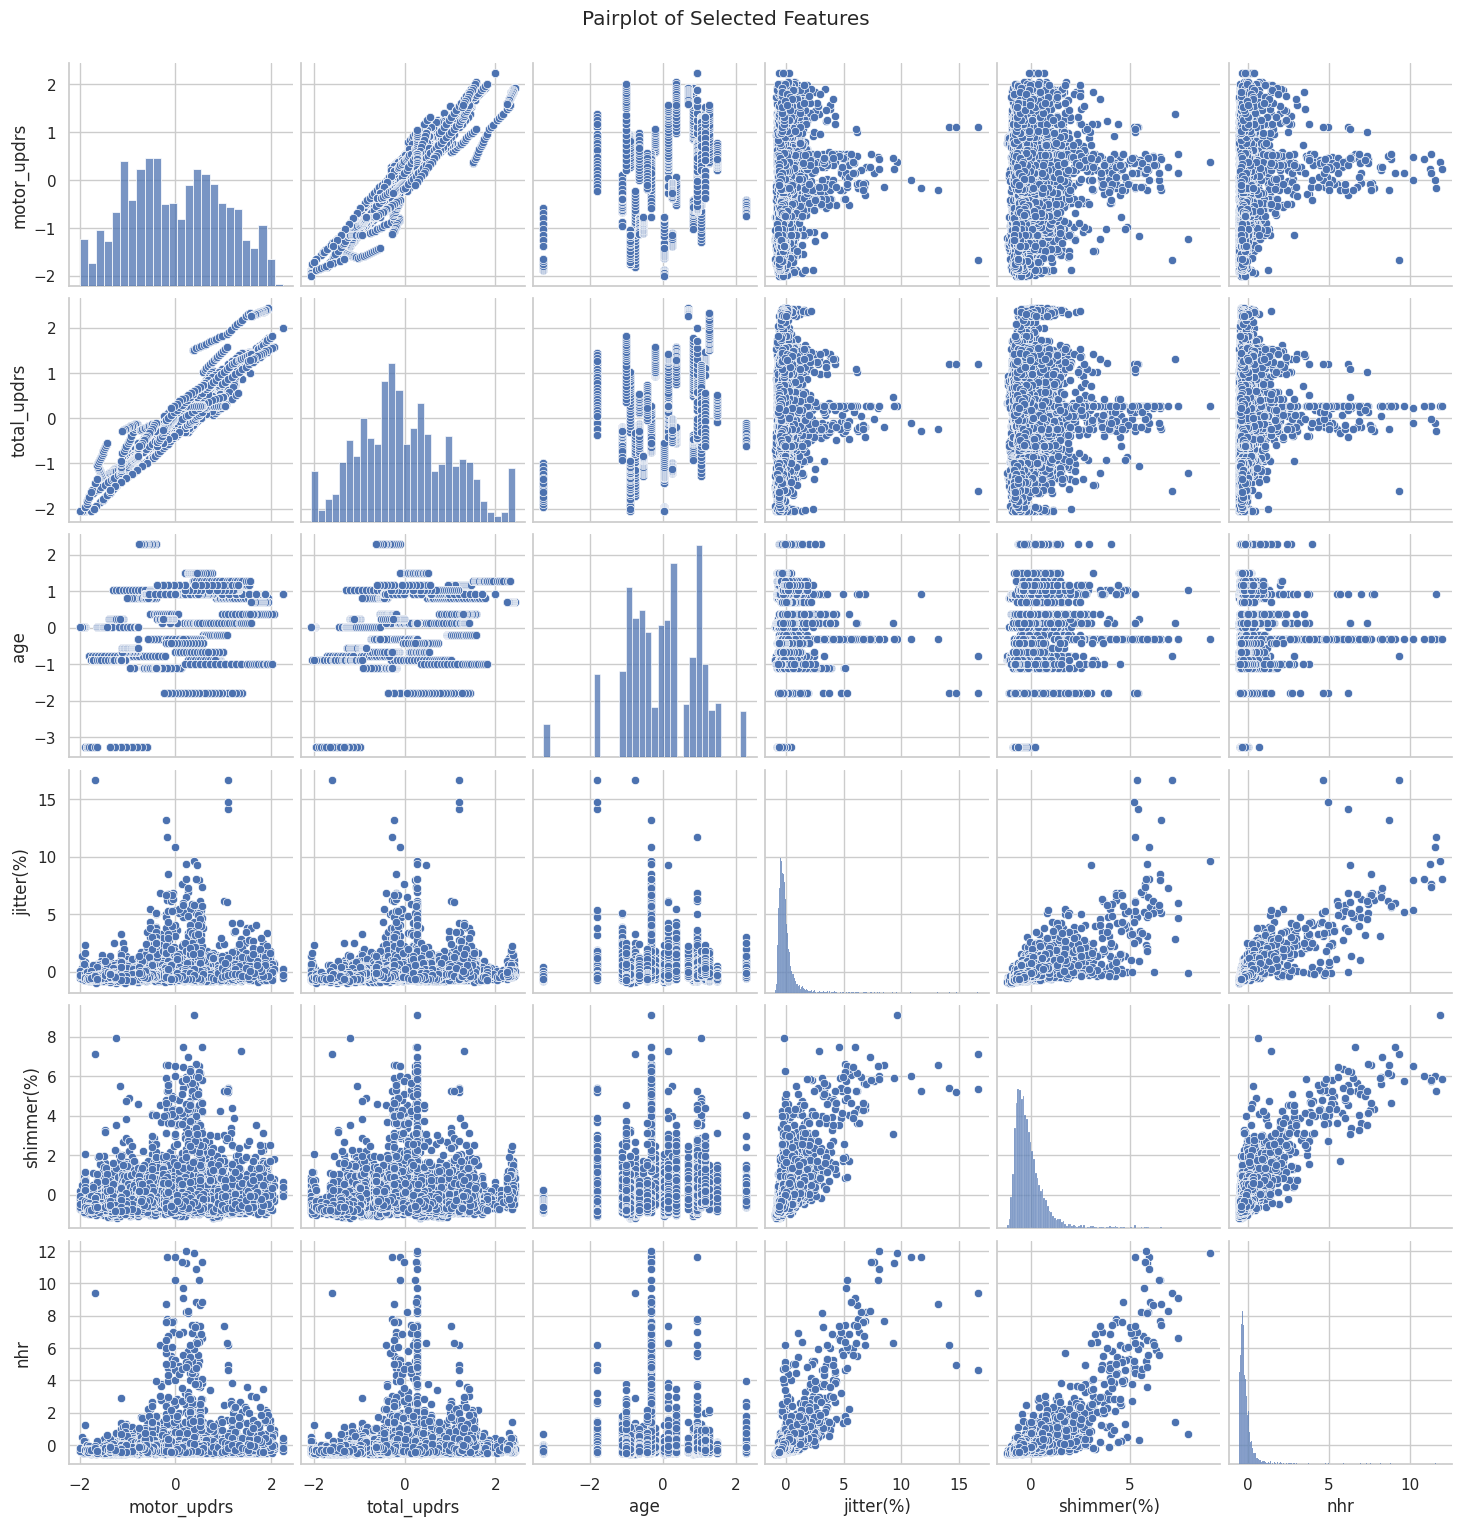

In [95]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Visualize the distribution of motor_updrs and total_updrs scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dataset2['motor_updrs'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Motor UPDRS Scores')

plt.subplot(1, 2, 2)
sns.histplot(dataset2['total_updrs'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Total UPDRS Scores')

plt.show()

# Visualize the correlation between features
plt.figure(figsize=(14, 10))
sns.heatmap(dataset2.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(dataset2[['motor_updrs', 'total_updrs', 'age', 'jitter(%)', 'shimmer(%)', 'nhr']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assume 'dataset2' is your DataFrame

# Extract features (X) and target variables (y)
X = dataset2.drop(['motor_updrs', 'total_updrs', 'subject#'], axis=1)
y_motor = dataset2['motor_updrs']
y_total = dataset2['total_updrs']

# Split the data into training and testing sets
X_train, X_test, y_train_motor, y_test_motor, y_train_total, y_test_total = train_test_split(
    X, y_motor, y_total, test_size=0.2, random_state=42
)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model for motor UPDRS
model_motor = LinearRegression()
model_motor.fit(X_train_scaled, y_train_motor)

# Create a linear regression model for total UPDRS
model_total = LinearRegression()
model_total.fit(X_train_scaled, y_train_total)

# Make predictions
y_pred_motor = model_motor.predict(X_test_scaled)
y_pred_total = model_total.predict(X_test_scaled)

# Evaluate the models
mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
r2_motor = r2_score(y_test_motor, y_pred_motor)

mse_total = mean_squared_error(y_test_total, y_pred_total)
r2_total = r2_score(y_test_total, y_pred_total)

print(f"Motor UPDRS Model - MSE: {mse_motor}, R^2: {r2_motor}")
print(f"Total UPDRS Model - MSE: {mse_total}, R^2: {r2_total}")


Motor UPDRS Model - MSE: 0.8477498416307523, R^2: 0.12243652571440977
Total UPDRS Model - MSE: 0.8150726237451179, R^2: 0.15798070419827304


In [98]:
# Extract features (X) for validation
X_val = dataset.drop(['UPDRS', 'PD', 'subject#', 'AutocorrelationBetweenNHRAndHNR','StandardDeviationOfPitch','MedianPitch', 'MeanPitch',  'MinimumPitch', 'MaximumPitch', 'NumberOfPulses', 'NumberOfPeriods', 'MeanPeriod', 'StandardDeviationOfPeriod', 'FractionOfUnvoicedFrames', 'NumberOfVoiceBreaks', 'DegreeOfVoiceBreaks'], axis=1)
X_val
# Standardize the features using the same scaler used for training
X_val_scaled = scaler.transform(X_val)  # 'scaler' is the StandardScaler trained on dataset2

# Make predictions for motor UPDRS and total UPDRS
y_pred_val_motor = model_motor.predict(X_val_scaled)
y_pred_val_total = model_total.predict(X_val_scaled)

# Assuming 'dataset' has columns 'UPDRS' and 'PD indicator' for validation
mse_val_motor = mean_squared_error(dataset['UPDRS'], y_pred_val_motor)
r2_val_motor = r2_score(dataset['UPDRS'], y_pred_val_motor)

mse_val_total = mean_squared_error(dataset['UPDRS'], y_pred_val_total)
r2_val_total = r2_score(dataset['UPDRS'], y_pred_val_total)

print(f"Motor UPDRS Validation - MSE: {mse_val_motor}, R^2: {r2_val_motor}")
print(f"Total UPDRS Validation - MSE: {mse_val_total}, R^2: {r2_val_total}")


Motor UPDRS Validation - MSE: 0.8354466454665544, R^2: 0.16445674544566224
Total UPDRS Validation - MSE: 0.8644862455654456, R^2: 0.1789214698733258


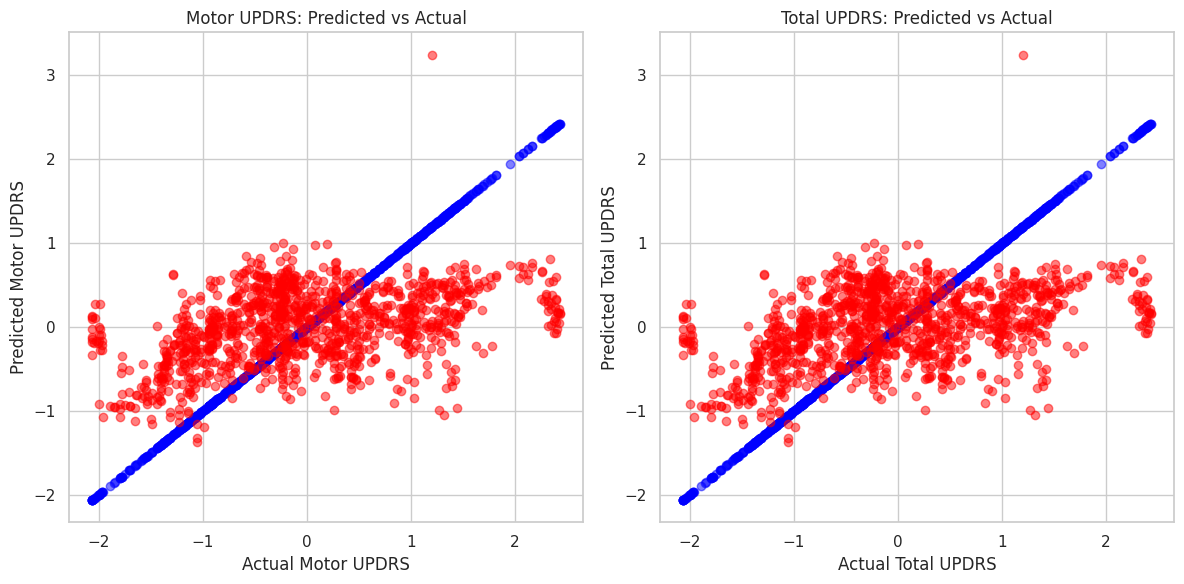

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already fitted the models and made predictions

# Scatter plot of predicted vs actual values for motor UPDRS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Scatter plot for actual values (in blue)
plt.scatter(y_test_total, y_test_total, color='blue', alpha=0.5, label='Actual')

# Scatter plot for predicted values (in red)
plt.scatter(y_test_total, y_pred_total, color='red', alpha=0.5, label='Predicted')

plt.title('Motor UPDRS: Predicted vs Actual')
plt.xlabel('Actual Motor UPDRS')
plt.ylabel('Predicted Motor UPDRS')

# Scatter plot of predicted vs actual values for total UPDRS
plt.subplot(1, 2, 2)
# Scatter plot for actual values (in blue)
plt.scatter(y_test_total, y_test_total, color='blue', alpha=0.5, label='Actual')

# Scatter plot for predicted values (in red)
plt.scatter(y_test_total, y_pred_total, color='red', alpha=0.5, label='Predicted')

plt.title('Total UPDRS: Predicted vs Actual')
plt.xlabel('Actual Total UPDRS')
plt.ylabel('Predicted Total UPDRS')

plt.tight_layout()
plt.show()






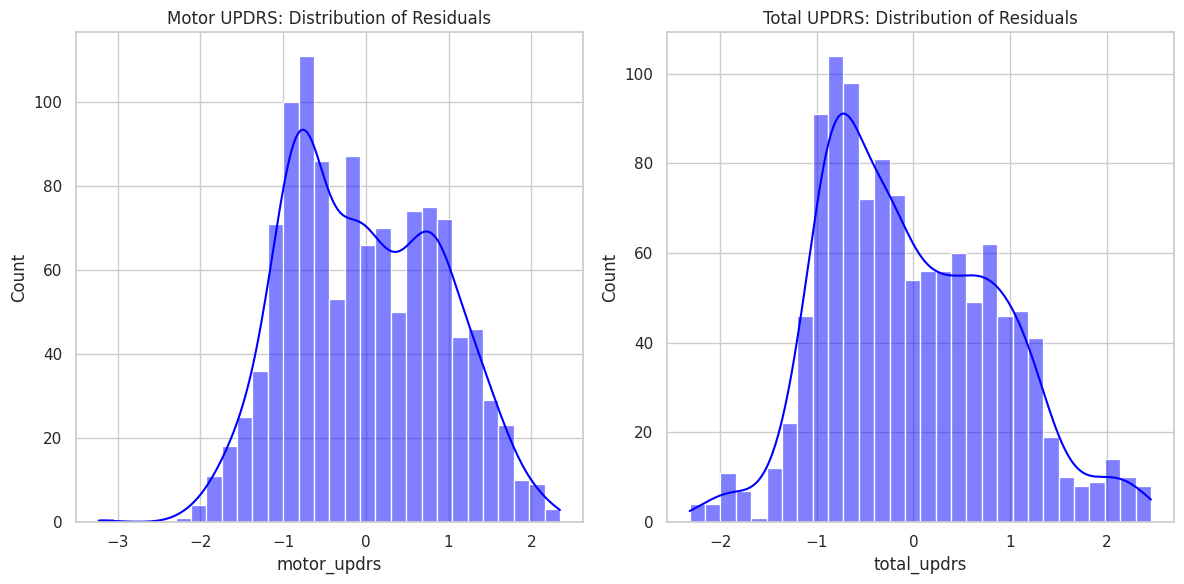

In [100]:
# Distribution of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_test_motor - y_pred_motor, bins=30, kde=True, color="blue")
plt.title('Motor UPDRS: Distribution of Residuals')

plt.subplot(1, 2, 2)
sns.histplot(y_test_total - y_pred_total, bins=30, kde=True, color="blue")
plt.title('Total UPDRS: Distribution of Residuals')

plt.tight_layout()
plt.show()